<a href="https://colab.research.google.com/github/PLEX-GR00T/Machine_Learning/blob/main/Tabular_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objecive

The goal is to create model(s) to predict building energy consumption. The dataset consists of building characteristics and climate and weather variables for the regions in which the buildings are located. Accurate predictions of energy consumption can help policymakers target retrofitting efforts to maximize emissions reductions. The dataset was created in collaboration with Climate Change AI (CCAI) and Lawrence Berkeley National Laboratory (Berkeley Lab)

### Data Description
The dataset consists of building characteristics (e.g. floor area, facility type etc), weather data for the location of the building (e.g. annual average temperature, annual total precipitation etc) as well as the energy usage for the building and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to the a single building observed in a given year. 

The eventual objective is to predict the Site EUI for each row as a function of the building features and the weather data for the location of the building. Your task for this asignment is to perform data processing, EDA and necessary feature transformation that would set you up for prediction.


### Data Dictionary

**id**: building id

**Year_Factor**: anonymized year in which the weather and energy usage factors were observed

**State_Factor**: anonymized state in which the building is located

**building_class**: building classification

**facility_type**: building usage type

**floor_area**: floor area (in square feet) of the building

**year_built**: year in which the building was constructed

**energy_star_rating**: the energy star rating of the building

**ELEVATION**: elevation of the building location

**january_min_temp**: minimum temperature in January (in Fahrenheit) at the location of the building

**january_avg_temp**: average temperature in January (in Fahrenheit) at the location of the building

**january_max_temp**: maximum temperature in January (in Fahrenheit) at the location of the building

**cooling_degree_days**: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**heating_degree_days**: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**precipitation_inches**: annual precipitation in inches at the location of the building

**snowfall_inches**: annual snowfall in inches at the location of the building

**snowdepth_inches**: annual snow depth in inches at the location of the building

**avg_temp**: average temperature over a year at the location of the building

**days_below_30F**: total number of days below 30 degrees Fahrenheit at the location of the building

**days_below_20F**: total number of days below 20 degrees Fahrenheit at the location of the building

**days_below_10F**: total number of days below 10 degrees Fahrenheit at the location of the building

**days_below_0F**: total number of days below 0 degrees Fahrenheit at the location of the building

**days_above_80F**: total number of days above 80 degrees Fahrenheit at the location of the building

**days_above_90F**: total number of days above 90 degrees Fahrenheit at the location of the building

**days_above_100F**: total number of days above 100 degrees Fahrenheit at the location of the building

**days_above_110F**: total number of days above 110 degrees Fahrenheit at the location of the building

**direction_max_wind_speed**: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**direction_peak_wind_speed**: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**max_wind_speed**: maximum wind speed at the location of the building

**days_with_fog**: number of days with fog at the location of the building

#### Target
**site_eui**: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills

Source: WiDS Datathon 2022

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding Data (Review)

* Understand distributions
* Trends
* Relationships
* Patterns

In [ ]:
!pip install skimpy

     |████████████████████████████████| 214 kB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 50.0 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from skimpy import skim
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Load tips_mdata.csv
data = pd.read_csv("/content/drive/MyDrive/244/train.csv")
type(data)

pandas.core.frame.DataFrame

#1.Understand Distributions

In [ ]:
#How big is the dataset? Print in few rows of the dataset?
data.shape

(75757, 64)

In [ ]:
data.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


###After looking at data, we have to check if ther is any dubplicat rows availabe or not. And theh row id may cause the issue because it may be the only raw with different data so that it may not be end up deteting redundant raw just because of that so. Remove the Id we dont need it. and try to check the Dubplicate data, if is there any remove it.

In [ ]:
data.drop(['id'], axis = 1, inplace=True)
data[data.duplicated()]
indata = data.drop_duplicates()
print("Number of dubplicate rows dropped: " + str(indata.shape[0]- data.shape[0]))

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
1002,2,State_1,Commercial,Education_Uncategorized,44593.0,NaN,NaN,7.9,27,48.951613,69,33,51.655172,78,34,52.822581,74,37,58.850000,90,45,64.612903,92,49,67.900000,103,53,70.467742,99,52,71.806452,100,49,68.466667,97,43,63.983871,100,35,55.283333,79,28,47.919355,65,791,2439,19.27,0.0,0,60.247268,3,0,0,0,113,35,1,0,1.0,NaN,1.0,NaN,40.342517
1098,3,State_1,Commercial,Education_Uncategorized,74125.0,NaN,NaN,771.8,39,58.419355,82,39,57.839286,80,44,59.887097,83,48,61.750000,80,54,65.983871,89,57,66.783333,88,58,68.838710,91,57,69.096774,93,58,71.183333,90,51,65.854839,89,51,65.466667,91,44,61.790323,85,896,1015,4.17,0.0,0,64.441096,0,0,0,0,52,3,0,0,NaN,NaN,NaN,NaN,56.776206
1099,3,State_1,Commercial,Education_Uncategorized,74125.0,NaN,NaN,771.8,39,58.419355,82,39,57.839286,80,44,59.887097,83,48,61.750000,80,54,65.983871,89,57,66.783333,88,58,68.838710,91,57,69.096774,93,58,71.183333,90,51,65.854839,89,51,65.466667,91,44,61.790323,85,896,1015,4.17,0.0,0,64.441096,0,0,0,0,52,3,0,0,NaN,NaN,NaN,NaN,56.776206
2217,3,State_1,Commercial,Education_Uncategorized,36137.0,NaN,NaN,44.2,25,44.822581,65,30,49.267857,72,37,59.516129,81,45,65.250000,93,47,69.903226,95,54,76.566667,107,56,80.209677,108,56,77.451613,105,46,72.516667,100,40,62.741935,86,37,54.916667,77,24,45.145161,67,1718,2263,4.69,0.0,0,63.261644,21,0,0,0,160,81,11,0,NaN,NaN,NaN,NaN,31.651127
3466,4,State_1,Commercial,Education_Uncategorized,4201.0,NaN,NaN,67.1,27,49.758065,74,32,52.839286,75,40,58.322581,82,40,61.916667,92,47,69.322581,98,50,73.983333,106,57,78.564516,105,55,76.354839,105,52,74.433333,102,43,68.032258,96,35,55.950000,80,28,52.758065,71,1658,1781,14.23,0.0,0,64.423288,3,0,0,0,169,88,12,0,NaN,NaN,NaN,NaN,116.250756
5837,3,State_2,Commercial,Office_Uncategorized,72467.0,1983.0,51.0,3.0,15,37.500000,69,17,35.732143,58,26,41.145161,62,26,56.583333,91,37,62.903226,91,58,73.866667,94,60,79.322581,98,55,73.783333,93,45,67.160000,93,30,58.816667,88,20,44.316667,75,19,39.500000,72,1306,4489,53.08,5.9,6,55.833333,66,8,0,0,97,20,0,0,NaN,NaN,NaN,NaN,98.435181
15305,1,State_6,Commercial,Education_College_or_university,258686.0,NaN,NaN,42.7,6,29.677419,53,15,36.035714,67,20,42.322581,77,35,54.300000,83,46,64.483871,89,56,72.316667,95,63,80.241935,104,59,75.274194,94,51,70.033333,86,33,57.096774,84,36,51.883333,70,22,43.306452,62,1331,4335,72.81,44.7,418,56.519178,54,11,1,0,84,16,1,0,1.0,1.0,1.0,12.0,25.489427
15367,1,State_6,Commercial,Health_Care_Inpatient,309327.0,1924.0,53.0,42.7,6,29.677419,53,15,36.035714,67,20,42.322581,77,35,54.300000,83,46,64.483871,89,56,72.316667,95,63,80.241935,104,59,75.274194,94,51,70.033333,86,33,57.096774,84,36,51.883333,70,22,43.306452,62,1331,4335,72.81,44.7,418,56.519178,54,11,1,0,84,16,1,0,1.0,1.0,1.0,12.0,700.319281
16412,1,State_6,Commercial,Education_College_or_university,6385382.0,NaN,NaN,42.7,6,29.677419,53,15,36.035714,67,20,42.322581,77,35,54.300000,83,46,64.483871,89,56,72.316667,95,63,80.241935,104,59,75.274194,94,51,70.033333,86,33,57.096774,84,36,51.8

Number of dubplicate rows dropped: -39


In [ ]:
display(indata.describe())

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
count,75718.000000,7.571800e+04,73901.000000,49036.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,75718.000000,34648.000000,33920.000000,34648.000000,29935.000000,75718.000000
mean,4.368393,1.657756e+05,1952.308440,61.049168,39.492266,11.431337,34.309172,59.053541,11.718469,35.524954,58.484588,21.604599,44.467443,70.895784,32.035606,53.784158,82.660794,44.704918,63.741918,88.987480,51.131131,71.066163,91.399495,60.571185,76.596134,95.542487,58.514290,75.348265,92.572215,50.790763,69.597273,92.171188,38.210729,58.726761,81.135265,28.628701,48.123061,71.202620,22.735083,41.624778,64.496579,1202.192240,4325.170831,42.431848,29.139948,164.885641,56.175947,48.764006,17.451861,4.888217,0.877136,82.708616,14.056407,0.279326,0.002443,66.575849,62.798231,4.191743,109.159312,82.568382
std,1.471110,2.456202e+05,37.057032,28.664237,60.553650,9.381661,6.995923,5.354621,12.577794,8.866980,8.414441,10.005153,6.656801,7.680800,5.576796,2.500103,4.100620,4.200359,2.793195,2.864908,3.416300,2.862147,3.603418,4.177810,4.090749,4.156739,4.442699,3.819432,4.139904,4.291343,3.604406,5.012426,5.094425,2.641341,5.579564,7.153349,4.093279,4.372307,9.014881,5.869388,6.054093,391.630058,824.263567,10.589174,17.810141,175.276416,2.241599,27.588600,14.470651,7.072358,2.894931,25.283873,10.940054,2.252150,0.142176,131.165788,130.323815,6.459697,50.707643,58.185549
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169
25%,3.000000,6.237000e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978.000000,39.350000,9.600000,10.000000,55.147541,22.0

### Now to get more about the data, I found the fancy library that can get us going for all basic check just like we were doing in R. This library we already installed before, called "Skimpy". 

* it gives you Data summary
* Data types summary
* All number as min, max, quartiles and interquartiles and more.

In [ ]:
skim(indata)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 75718  │ │ int64       │ 36    │                                    │
│ │ Number of columns │ 63     │ │ float64     │ 24    │                                    │
│ └───────────────────┴────────┘ │ object      │ 3     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃        ┃ missin ┃ comple ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┃        ┃ g      ┃ te     ┃        ┃        ┃      ┃       ┃        ┃        ┃        ┃  │
│ ┃        ┃        ┃ rate   ┃        ┃        ┃      ┃       ┃        ┃        ┃        ┃  │
│ ┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Year_F │      0 │      1 │    4.4 │    1.5 │    1 │     3 │      6 │      6 │ ▁▃▄▅▇█ │  │
│ │ actor  │        │        │        │        │      │       │        │        │        │  │
│ │ floor_ │      0 │      1 │ 170000 │ 250000 │  940 │ 62000 │ 170000 │ 640000 │   █    │  │
│ │ area   │        │        │        │        │      │       │        │      0 │        │  │
│ │ year_b │   1800 │   0.98 │   2000 │     37 │    0 │  1900 │   2000 │   2000 │      █ │  │
│ │ uilt   │        │        │        │        │      │       │        │        │        │  │
│ │ energy │  27000 │   0.65 │     61 │     29 │    0 │    40 │     85 │    100 │ ▃▃▄▅▇█ │  │
│ │ _star_ │        │        │        │        │      │       │        │        │        │  │
│ │ rating │        │        │        │        │      │       │        │        │        │  │
│ │ ELEVAT │      0 │      1 │     39 │     61 │ -6.4 │    12 │     43 │   1900 │   █    │  │
│ │ ION    │        │        │        │        │      │       │        │        │        │  │
│ │ januar │      0 │      1 │     11 │    9.4 │  -19 │     6 │     13 │     49 │  ▁█ ▁  │  │
│ │ y_min_ │        │        │        │        │      │       │        │        │        │  │
│ │ temp   │        │        │        │        │      │       │        │        │        │  │
│ │ januar │      0 │      1 │     34 │      7 │   11 │    30 │     37 │     65 │  ▃█▁▁  │  │
│ │ y_avg_ │        │        │        │        │      │       │        │        │        │  │
│ │ temp   │        │        │        │        │      │       │        │        │        │  │
│ │ januar │      0 │      1 │     59 │    5.4 │   42 │    56 │     62 │     91 │  ▁▅█▁  │  │
│ │ y_max_ │        │        │        │        │      │       │        │        │        │  │
│ │ temp   │        │        │        │        │      │       │        │        │        │  │
│ │ februa │      0 │      1 │     12 │     13 │  -13 │     2 │     20 │     48 │ ▁█▇▃▃▁ │  │
│ │ ry_min │        │        │        │        │      │       │        │        │        │  │
│ │ _temp  │        │        │        │        │      │       │        │        │        │  │
│ │ februa │      0 │      1 │     36 │    8.9 │   13 │    32 │     41 │     65 │ ▁▃█▂▁  │  │
│ │ ry_avg │        │        │        │        │      │       │        │        │        │  │
│ │ _temp  │        │        │        │        │      │       │        │        │        │  │
│ │ februa │      0 │      1 │     58 │    8.4 │   38 │    55 │     62 │     89 │ ▂ █▂▁  │  │
│ │ ry_max │        │        │        │        │    

### Now just for our representation just given about, we have 3 different Object types colums, with categories in it. Let's check all Numberic and non numeric type of colums. For further process.

In [ ]:
num_var = indata.columns[indata.dtypes != 'object']
cat_var = indata.columns[indata.dtypes == 'object']

print(num_var)
print(cat_var)

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_3

In [ ]:
indata[num_var].isnull().sum().sort_values(ascending=False)

days_with_fog                45783
direction_peak_wind_speed    41798
max_wind_speed               41070
direction_max_wind_speed     41070
energy_star_rating           26682
year_built                    1817
Year_Factor                      0
november_max_temp                0
cooling_degree_days              0
december_max_temp                0
december_avg_temp                0
december_min_temp                0
october_max_temp                 0
november_avg_temp                0
november_min_temp                0
precipitation_inches             0
october_avg_temp                 0
heating_degree_days              0
days_below_30F                   0
snowfall_inches                  0
snowdepth_inches                 0
avg_temp                         0
september_max_temp               0
days_below_20F                   0
days_below_10F                   0
days_below_0F                    0
days_above_80F                   0
days_above_90F                   0
days_above_100F     

# Conclusion of Understanding Data
### In this part i can say that it so big data and it has 3 to 4 colums with lot of data missing, which is more than 50%. So, i was so confused to remove those rows. But, I conclude that we might not use that data for prediction, but those rows are well needed. Or else we might have only 50% of the whole data, which make sense not to delete those. And on the other way idk how to impute those, and how they gonna affect the data if i do. So, so just left that part for more exploartion at later time.

#2. Finding Trends

### In this part we will try to do some EDA, I tried not to do exhaustive EDA. However, this Dataset has humangous data colums to explore. I am trying to explore 4 of the Columns that. Good EDA for head start and we might fing some Trend in any of those.



Text(0, 0.5, '')

No handles with labels found to put in legend.


Text(0, 0.5, '')

No handles with labels found to put in legend.


Text(0.5, 0.98, 'Categorical Features Representation in (Count,%)')

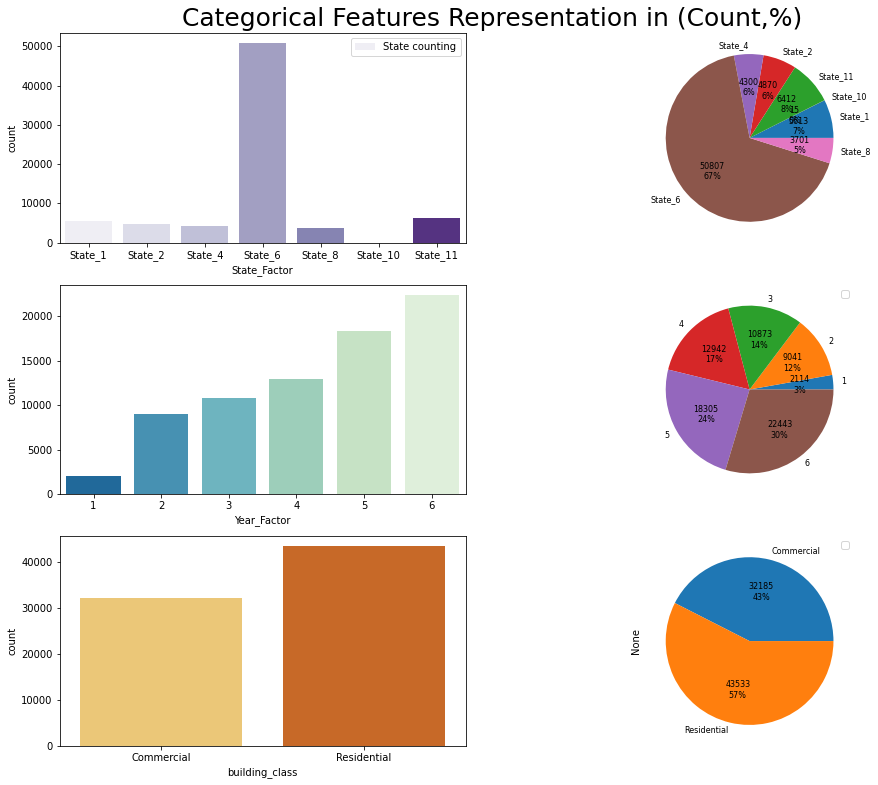

In [ ]:
def calc_per(val):
    return f'{val/100 *len(indata):.0f}\n{val:.0f}%'

fig, ax = plt.subplots(3,2, figsize=(16,12), sharey=False)
fig.subplots_adjust(top=0.95)

sns.countplot(x=indata['State_Factor'], label='State counting', ax = ax[0,0], palette='Purples') 
ax[0,0].legend();
indata.groupby('State_Factor').size().plot(kind='pie', autopct=calc_per, 
                                           textprops={'fontsize':8}, ax= ax[0,1])
ax[0,1].set_ylabel('')

sns.countplot(x=indata['Year_Factor'], label='Year_Factor', ax = ax[1,0], palette='GnBu_r')
ax[1,1].legend();
indata.groupby('Year_Factor').size().plot(kind='pie', autopct=calc_per, 
                                           textprops={'fontsize':8}, ax= ax[1,1])
ax[1,1].set_ylabel('')

sns.countplot(x=indata['building_class'], label='Building_class', ax = ax[2,0], palette='YlOrBr')
ax[2,1].legend();
indata.groupby('building_class').size().plot(kind='pie', autopct=calc_per, 
                                           textprops={'fontsize':8}, ax= ax[2,1])

plt.suptitle('Categorical Features Representation in (Count,%)', fontsize = 25)

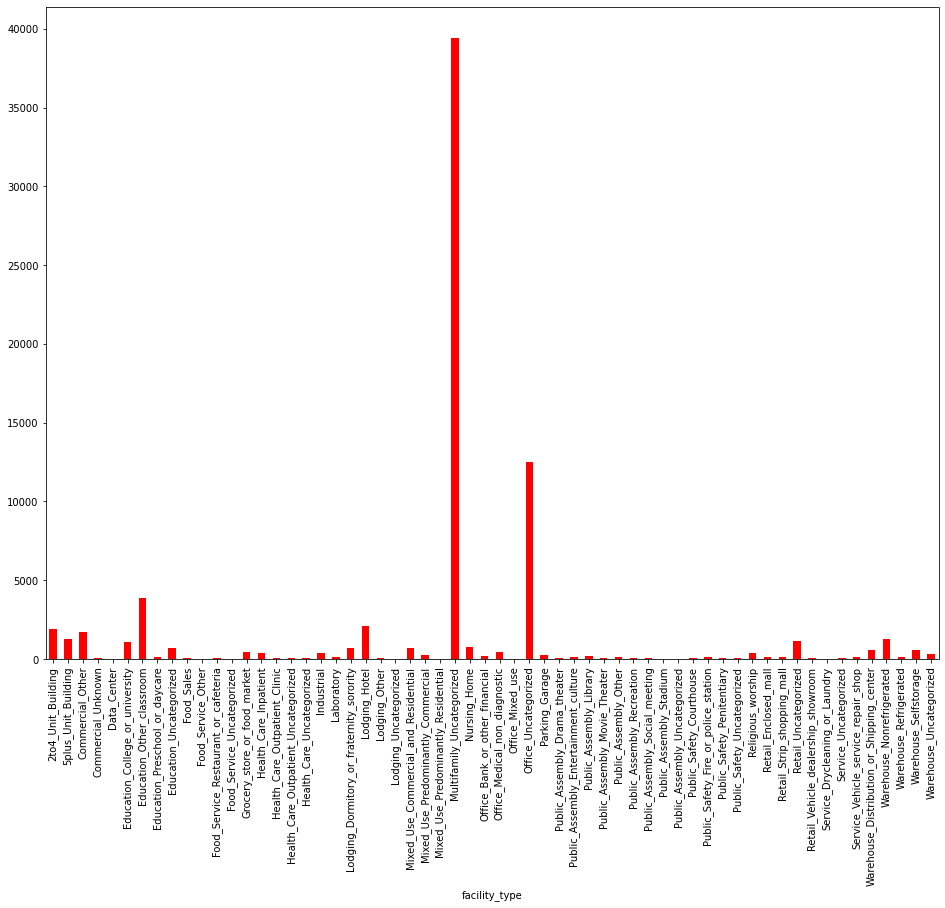

In [ ]:
indata.groupby('facility_type').size().plot(kind='bar',figsize=(16,12),color = 'red')

#Trend Conclusion
### So, after looking of those graphs. We conspicuously say that as year increases, weather and energy usage factors's observations also increases. And as you can see there are more Residential areas then Commercials, We can kind of guess that, that might be the major factor to look at site_eui. Which we can easily see from the facility_type histogram that, major increase in the Multifamily categorie. 

# 3. Relationship

### Here, we will be looking for the relationship among the colums. We, will fist apply the Correlation Matrix.

In [ ]:
# form correlation matrix
matrix = indata.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                           Year_Factor  floor_area  ...  days_with_fog  site_eui
Year_Factor                   1.000000   -0.035031  ...       0.619172 -0.044698
floor_area                   -0.035031    1.000000  ...       0.016503  0.073443
year_built                    0.084114    0.100865  ...       0.084143  0.017413
energy_star_rating           -0.005036    0.034970  ...       0.019369 -0.512147
ELEVATION                     0.133415    0.098675  ...       0.495437  0.011972
january_min_temp              0.008060   -0.149109  ...      -0.035839 -0.179377
january_avg_temp             -0.099454   -0.138342  ...      -0.108701 -0.168189
january_max_temp             -0.291106   -0.104510  ...      -0.321974 -0.097112
february_min_temp            -0.391110   -0.107037  ...      -0.286003 -0.147693
february_avg_temp            -0.101543   -0.121013  ...      -0.173482 -0.154391
february_max_temp            -0.093443   -0.042847  ...      -0.189412 -0.107052
mar

In [ ]:
matrix.unstack().sort_values()[:60]

heating_degree_days        january_avg_temp            -0.907341
january_avg_temp           heating_degree_days         -0.907341
heating_degree_days        january_min_temp            -0.890900
january_min_temp           heating_degree_days         -0.890900
days_below_30F             january_avg_temp            -0.890131
january_avg_temp           days_below_30F              -0.890131
avg_temp                   heating_degree_days         -0.887888
heating_degree_days        avg_temp                    -0.887888
days_below_20F             february_avg_temp           -0.886850
february_avg_temp          days_below_20F              -0.886850
days_below_20F             march_min_temp              -0.886264
march_min_temp             days_below_20F              -0.886264
april_avg_temp             heating_degree_days         -0.884038
heating_degree_days        april_avg_temp              -0.884038
january_min_temp           days_below_30F              -0.863610
days_below_30F           

# Relationship Conclusion
### So, here the total number of Correlation matrix is so huge. So, I was able to print only handfull of 60 out off all. Which are sorted and as we can see, all of those are highly correlated. Because their values are above |0.5|. This might be very helpful later on to find and check the behaviour of the any two colums. 

#4. Patterns

### Here, I want to try to find any patterns regarding "site_eui" with the years and with the states. 

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Year 1')

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Year 2')

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Year 3')

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Year 4')

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Year 5')

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Year 6')

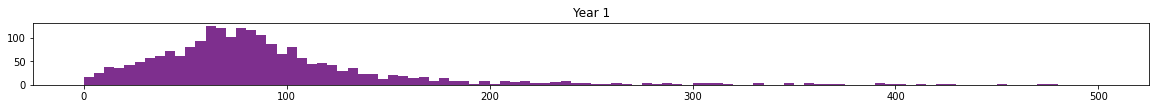

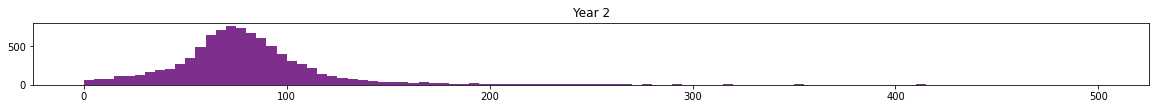

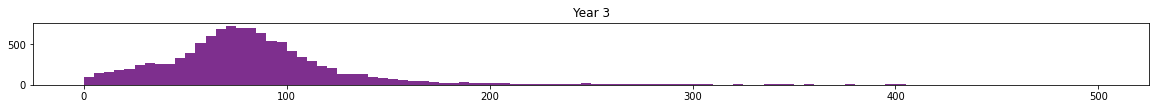

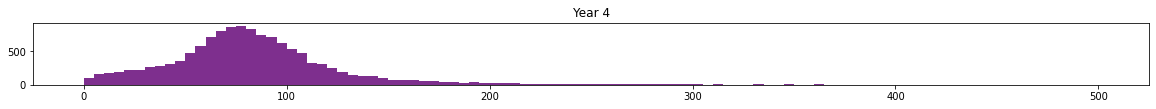

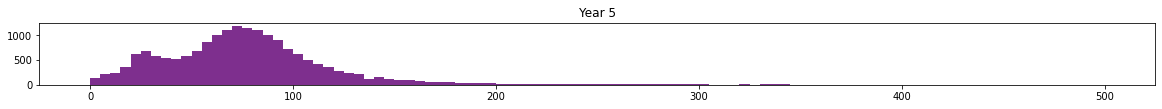

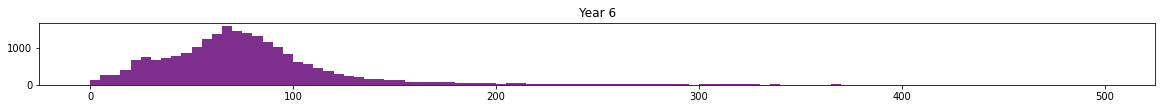

In [ ]:
for i in range(1, 7):
    plt.figure(figsize=(20,8))
    plt.subplot(6, 1, i)
    plt.title(f'Year {i}')
    n, bins, patches = plt.hist(indata.loc[indata['Year_Factor'] == i,
                                             'site_eui'], 100,range=(0, 500), 
                                            density=False, facecolor='#7E2F8E')

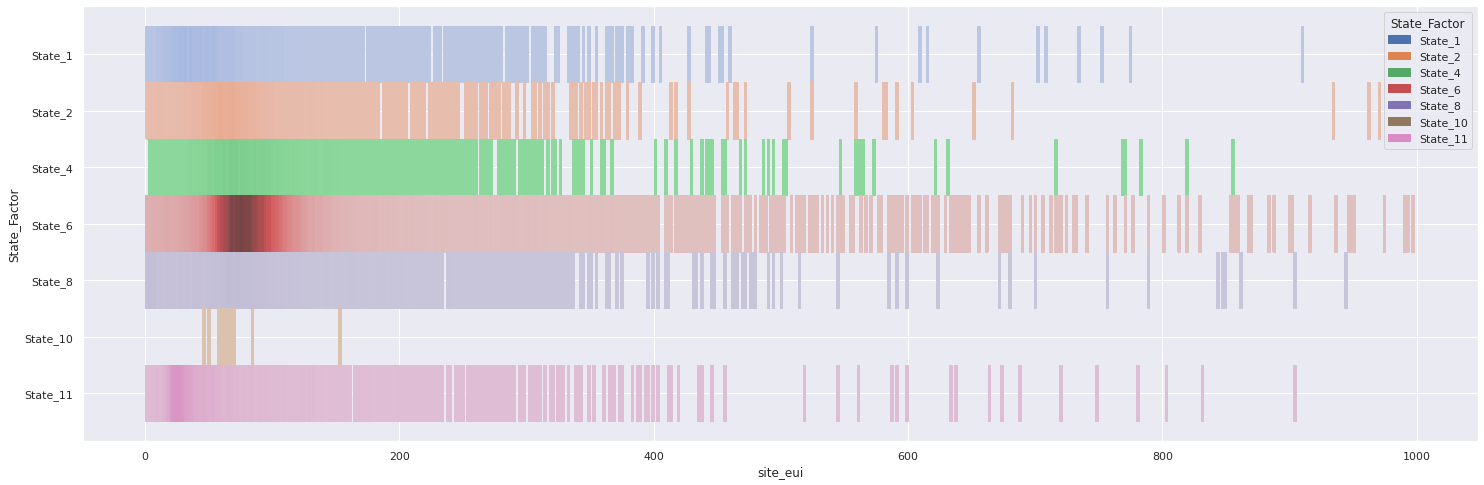

In [ ]:
sns.set(rc={'figure.figsize':(25,8)})

sns.histplot(data=indata, y='State_Factor', x='site_eui', hue='State_Factor')

# Pattern Conclusion
### Here, just by looking at it, we can say that, the distribuiton of the site_eui stays the same each year. It hardly change any. But, it does has the outliear in a good amount. So, as it says the same for State_Factor. But, the only thing is state_10 has hardly observation among all the states, thats whay it is not at all dence. However, state_6 has so much dence and concentrated data, which is very easy to guess, because most of the data is from the State_6. From this Pattern, we might gess that next year if they have the observations, state_6 might have more obervaitons then this one, because that state looks like verh highly populated or it uses high power for something.

# 5. Extra exploartion.

### I tried to learn new things from the tutorial that you gave us in the live class. I created my own one colums just to tryout the new code and the Scikit learn libarary. 

In [ ]:
# Create a new column percent_tip
indata["%_fog_days"] = indata["days_with_fog"]*100 / 365
indata.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(75718, 64)

In [ ]:
indata.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,%_fog_days
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,NaN
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,3.287671
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,3.287671
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3.287671
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0920a16450>]],
      dtype=object)

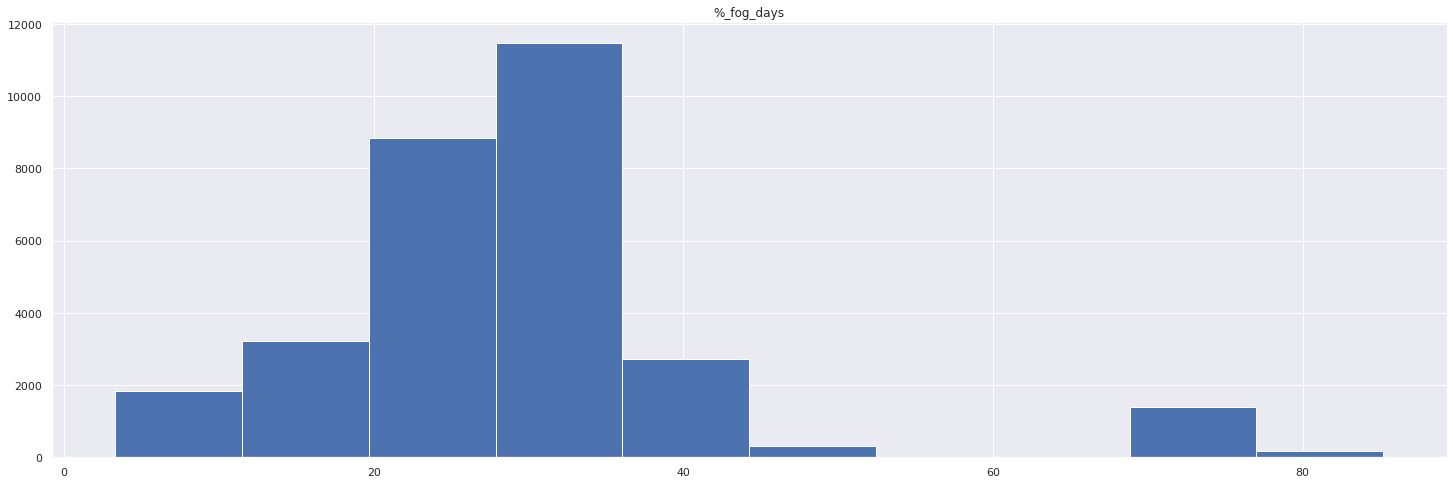

In [ ]:
# Basic visualizations , scatter, histogram, boxplot
indata[["%_fog_days"]].hist()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


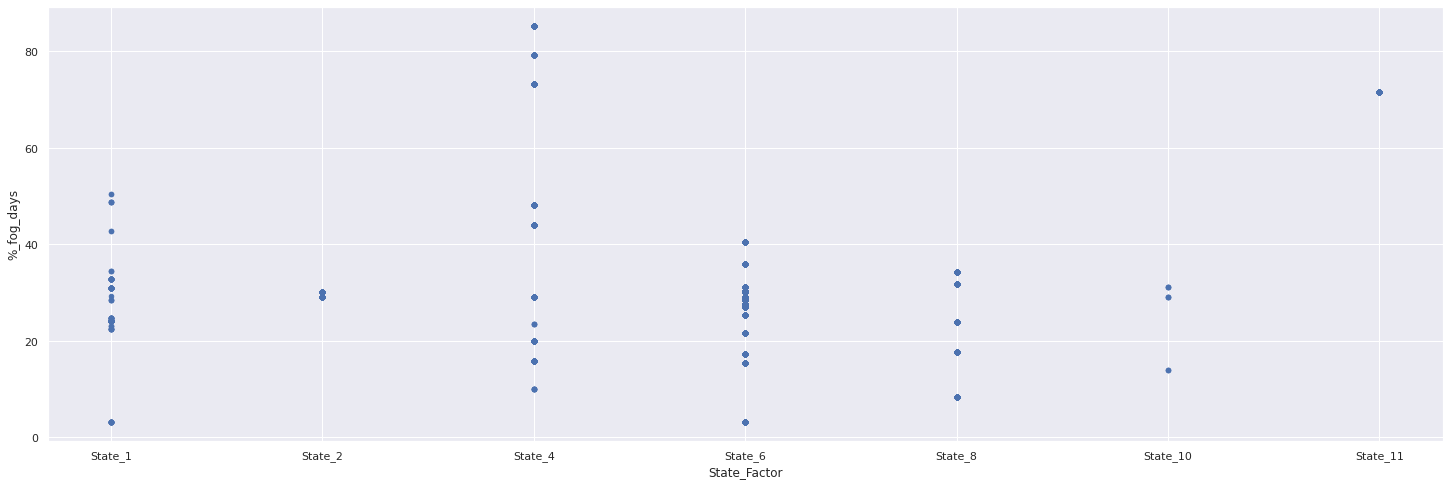

In [ ]:
indata.plot.scatter(x="State_Factor", y="%_fog_days")

#scikit-learn


In [ ]:
import numpy as np
from sklearn import preprocessing

In [ ]:
type(indata[["%_fog_days"]])

pandas.core.frame.DataFrame

#### Rescaling a feature array 
##### MinMaxScaler $x_{i}' = \frac{x_i - min(x)}{max(x) - min(x)}$


In [ ]:
indata["%_fog_days"]

0             NaN
1        3.287671
2        3.287671
3        3.287671
4             NaN
           ...   
75752         NaN
75753         NaN
75754         NaN
75755         NaN
75756         NaN
Name: %_fog_days, Length: 75718, dtype: float64

In [ ]:
fog_days = indata[indata['days_with_fog'].notnull()]

(array([ 1825,  3222,  8835, 11466,  2709,   323,     0,     0,  1385,
          170]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

(array([ 1825.,  3222.,  8835., 11466.,  2709.,   323.,     0.,     0.,
         1385.,   170.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<function matplotlib.pyplot.show>

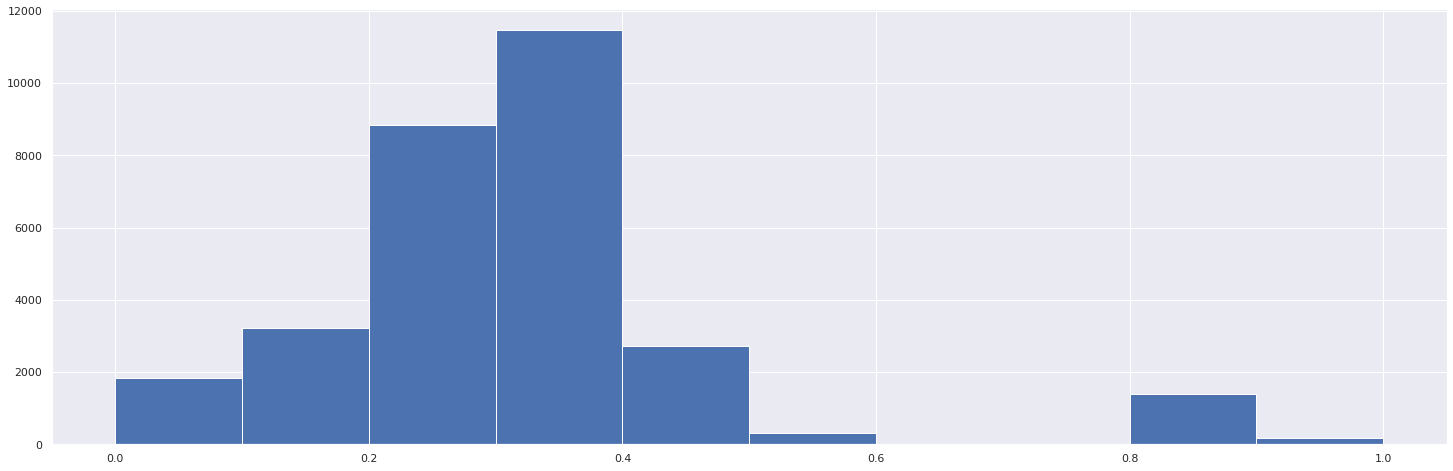

In [ ]:
# Creating scaler, either for (0,1) or (-1,1)
minmaxscale = preprocessing.MinMaxScaler(feature_range=(0,1))

# Scaling feature
scaled_feature = minmaxscale.fit_transform(fog_days[["%_fog_days"]])
# print(scaled_feature)
# show feature
np.histogram(scaled_feature)

import matplotlib.pyplot as plt
plt.hist(scaled_feature)
plt.show

# Learning

As a part of the learning I kept only code that makes sense to me for my newly created colums. Now, if I am missing something in the homework I would like to add more things as per you expectations, but this was kind of DIY and for explorations, that how far i went this time. 

# Assignment : [Python] Tabular Data Model Fitting 


In [ ]:
#Load tips_mdata.csv
test = pd.read_csv("/content/drive/MyDrive/244/test.csv")
type(test)

pandas.core.frame.DataFrame

# 1. Prerocessing

## Let's check Trarget Variable EUI with all Numerical Variable.

In [ ]:
num = list(indata.select_dtypes(include=[np.number]).columns)
obj = list(indata.select_dtypes(exclude=[np.number]).columns)

In [ ]:
# Calc conversion rate per group
def calc_EUI(dataframe, column_names=None):
    print('test')
    if column_names != None:
        # Calc mean EUI
        #print('test')
        mean_EUI = dataframe.groupby(column_names)['site_eui'].mean()  
        #print(mean_EUI)
        # Fill missing values with 0
        mean_EUI = mean_EUI.fillna(0) 
    else:       
        # Conversion rate 
        mean_EUI = dataframe['site_eui'].mean()  

    return round(mean_EUI,2)

original_EUI = calc_EUI(indata)

test


<Figure size 1200x5280 with 0 Axes>

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs Year_Factor')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs floor_area')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs year_built')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs energy_star_rating')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs ELEVATION')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs january_min_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs january_avg_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs january_max_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs february_min_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs february_avg_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs february_max_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs march_min_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs march_avg_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs march_max_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs april_min_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs april_avg_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs april_max_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs may_min_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs may_avg_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs may_max_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs june_min_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs june_avg_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs june_max_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs july_min_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs july_avg_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs july_max_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs august_min_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs august_avg_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs august_max_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs september_min_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs september_avg_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs september_max_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs october_min_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs october_avg_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs october_max_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs november_min_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs november_avg_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs november_max_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs december_min_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs december_avg_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs december_max_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs cooling_degree_days')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs heating_degree_days')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs precipitation_inches')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs snowfall_inches')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs snowdepth_inches')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs avg_temp')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs days_below_30F')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs days_below_20F')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs days_below_10F')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs days_below_0F')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs days_above_80F')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs days_above_90F')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs days_above_100F')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs days_above_110F')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs direction_max_wind_speed')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs direction_peak_wind_speed')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs max_wind_speed')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs days_with_fog')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs site_eui')

test


Text(0, 0.5, 'EUI')

Text(0.5, 1.0, 'EUI vs %_fog_days')

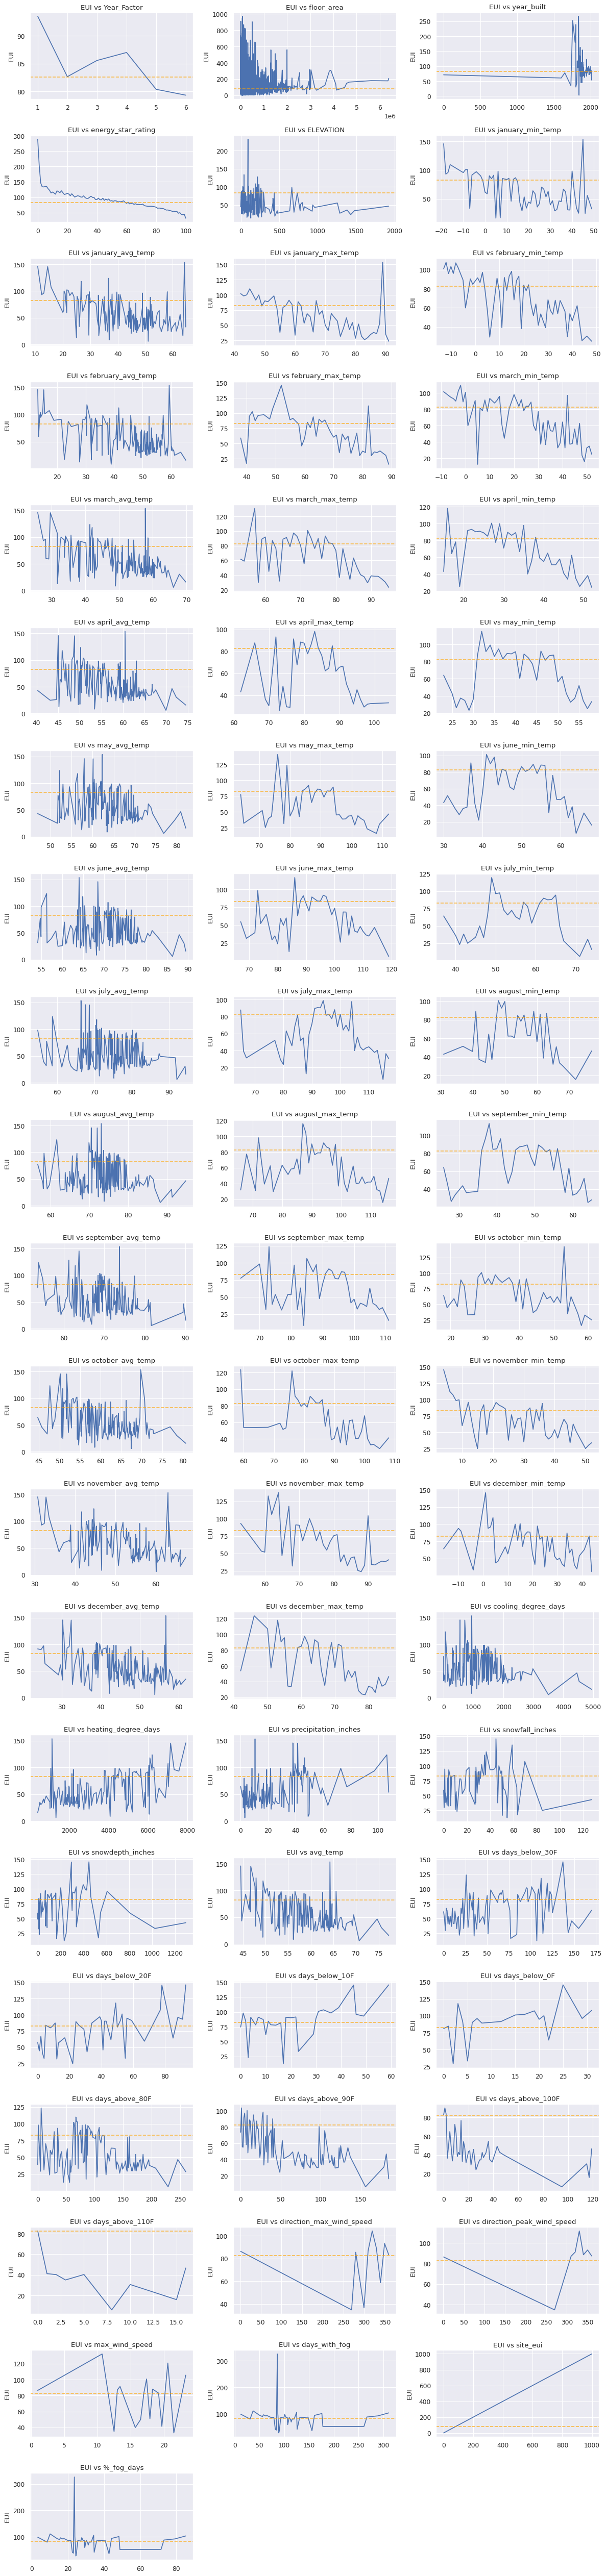

In [ ]:
plt.figure(figsize=(15, 66), dpi=80)

for i, col in enumerate(num):
    # Calc conv rate 
    eui = calc_EUI(indata, [col])
    # #print(eui)
    plt.subplot(22,3,i+1);plt.plot(eui.index, eui);plt.ylabel('EUI') 
    plt.title(f'EUI vs {col}')
    # plot the mean 
    plt.axhline(y=original_EUI, color='orange', linestyle='--', alpha=0.7)
# Show the plot
plt.tight_layout()
plt.show()    



1.   EUI drops significantly when energy star rating <50
This is expected since buildings with energy star ratings theoretically have more energy efficient features.
2.  EUI drops when year factor >5
3.  EUI decrease with cooling degree days but increases with heating degree days
There is a step drop in EUI when cooling degree days >2000 and a step increase in EUI when heating degree days is >4000.
4. EUI drop significantly when snow depth <700 inches and snowfall >70 inches

And looking at all the factors I decided to choose this below list as a feature to count for our Model.

* 'heating_degree_days'
* 'cooling_degree_days'
* 'facility_type', 
* 'Year_Factor',
* 'energy_star_rating',
* 'year_built',
* 'floor_area',
* 'ELEVATION',
* 'State_Factor',
* 'building_class',
* 'snowdepth_inches',
* 'july_avg_temp'





 


## Preprocess with Encoder with Object type

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in obj:
    encoder = LabelEncoder()
    encoder.fit(indata[col])
    indata[col] = encoder.transform(indata[col])

    for label in np.unique(indata[col]):
        if label not in encoder.classes_: 
            encoder.classes_ = np.append(encoder.classes_, label) 
    test[col] = encoder.transform(test[col])

LabelEncoder()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


LabelEncoder()

LabelEncoder()

In [ ]:
indata["State_Factor_encoded"] = indata.groupby("State_Factor")["site_eui"].transform("mean")
indata["building_class_encoded"] = indata.groupby("building_class")["site_eui"].transform("mean")
indata["facility_type_encoded"] = indata.groupby("facility_type")["site_eui"].transform("mean")

indata

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,%_fog_days,State_Factor_encoded,building_class_encoded,facility_type_encoded
0,1,0,0,13,61242.0,1942.0,11.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,NaN,62.197830,85.728280,241.135162
1,1,0,0,55,274000.0,1955.0,45.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,3.287671,62.197830,85.728280,39.559542
2,1,0,0,48,280025.0,1951.0,97.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,3.287671,62.197830,85.728280,100.965937
3,1,0,0,6,55325.0,1980.0,46.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3.287671,62.197830,85.728280,69.441531
4,1,0,0,56,66000.0,1985.0,100.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,NaN,62.197830,85.728280,38.209399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,2,0,32,20410.0,1995.0,8.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,NaN,53.989234,85.728280,77.084820
75753,6,2,1,1,40489.0,1910.0,98.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,NaN,53.989234,80.232193,36.737785
75754,6,2,0,2,28072.0,1917.0,NaN,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6

In [ ]:
di = indata[["State_Factor","State_Factor_encoded"]].drop_duplicates().set_index('State_Factor').to_dict()['State_Factor_encoded']
indata= indata.replace({"State_Factor":di})
test= test.replace({"State_Factor":di})

di = indata[["building_class","building_class_encoded"]].drop_duplicates().set_index('building_class').to_dict()['building_class_encoded']
indata = indata.replace({"building_class":di})
test= test.replace({"building_class":di})

di = indata[["facility_type","facility_type_encoded"]].drop_duplicates().set_index('facility_type').to_dict()['facility_type_encoded']
indata = indata.replace({"facility_type":di})
test = test.replace({"facility_type":di})

indata = indata.drop(['State_Factor_encoded', 'building_class_encoded', 'facility_type_encoded'],
                                axis = 1)

# 2. Models

In [ ]:
X = indata.drop(['site_eui', '%_fog_days'],axis =1)
Y = indata['site_eui']

In [ ]:
features_selected = [
 'facility_type',
 'Year_Factor',
 'energy_star_rating',
 'year_built',
 'floor_area',
 'ELEVATION',
 'State_Factor',
 'building_class',
 'snowdepth_inches',
 'july_avg_temp',
 'heating_degree_days',
 'cooling_degree_days']

# MODEL 1 : Cat Boost

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 76.1 MB 61.5 MB/s 


In [ ]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(
                    iterations=1000,
                    grow_policy='Lossguide',
                    verbose=False,
                    task_type='GPU',
                    l2_leaf_reg=1,
                    learning_rate=0.1,
                    depth= 10,
                )

# Fit model
cat.fit(X,Y)
# Get predictions
preds = cat.predict(test)

In [ ]:
cat.score(X,Y)

0.7945553438523607

In [ ]:
out = pd.DataFrame(test['id'])
out['site_eui'] = preds
out.head()

,id,site_eui
0,75757,252.941531
1,75758,246.462648
2,75759,256.833029
3,75760,258.869848
4,75761,275.494664


## MODEL 2 : XGBoost

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
                    grow_policy='lossguide',
                    tree_method='gpu_hist',
                    n_estimators=1000,
                    eta=0.1, 
                    max_depth= 10,
                    reg_lambda=1 #
                )

xgb.fit(X,Y)
new_test = test.drop(['id'],axis=1)
predic_xgb = xgb.predict(new_test)

[01:31:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.1, grow_policy='lossguide', max_depth=10, n_estimators=1000,
             tree_method='gpu_hist')

In [ ]:
xgb.score(X,Y)

0.9740052271739986

In [ ]:
out2 = pd.DataFrame(test['id'])
out2['site_eui'] = predic_xgb
out2.head()

,id,site_eui
0,75757,274.658752
1,75758,206.064590
2,75759,207.383881
3,75760,254.965073
4,75761,247.812378


## MODEL 3 : LightGBM

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
                    num_iterations=1000,
                    learning_rate=0.1,
                    reg_lambda=10 
                )
lgbm.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMRegressor(num_iterations=1000, reg_lambda=10)

In [ ]:
new_test2 = test.drop(['id'],axis=1)
predict_light = lgbm.predict(new_test2)

In [ ]:
out3 = pd.DataFrame(test['id'])
out3['site_eui'] = predict_light
out3.head()

,id,site_eui
0,75757,276.453419
1,75758,240.140731
2,75759,245.367244
3,75760,249.749654
4,75761,280.784962


In [ ]:
lgbm.score(X,Y)

0.7292167178509703